In [161]:
import pandas as pd
import numpy as np
#!pip install pyranges
import pyranges
import os
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import glob
import random

# Calculating metrics from Union made from Bedtools

In [155]:
union = pd.read_csv('bedtools_250bp_merge_union_ATAC_lanceotron_with_peaks_max.blacklist.bed', delimiter='\t', header = None)

union.rename({0:"Chromosome", 1:"start", 2:"end", 3:"max-values", 4:"donor-peaks"}, axis =1, inplace = True)
union

,Chromosome,start,end,max-values,donor-peaks
0,chr1,827137,828028,"3.7252,4.56554,3.40374,5.65625,6.40897,3.44004...","Don049-827137-827934,Don020-827172-827970,Don0..."
1,chr1,829923,830720,"1.65689,1.09556,0.94428,1.32952,1.37397,1.3480...","Don024-829923-830551,Don043-829960-830479,Don0..."
2,chr1,842477,843381,"1.90068,1.72961,2.31814,2.2759,2.19415,2.301,1...","Don041-842477-843245,Don042-842481-843270,Don0..."
3,chr1,869550,870311,"1.806,0.988618,1.06528,0.784217,1.15545,0.9407...","Don012-869550-870214,Don027-869571-870195,Don0..."
4,chr1,904229,905052,"0.973032,0.861464,1.32952,1.02348,1.1505,1.170...","Don028-904229-904908,Don004-904257-904990,Don0..."
...,...,...,...,...,...
56894,chrX,155612306,155613220,"1.18388,1.40617,1.24266,1.40467,0.86545,0.6883...","Don007-155612306-155613084,Don026-155612327-15..."
56895,chrX,155632242,155633102,"0.869865,2.00273,0.823791,1.33859,1.07274,0.71...","Don024-155632242-155632906,Don026-155632256-15..."
56896,chrX,155745433,155746210,"1.04692,0.411314,0.767228,0.315434,0.976241,1....","Don008-155745433-155746210,Don003-155745540-15..."
56897,chrX,155820003,155820512,0.264914,Don003-155820003-155820512


In [ ]:
union['max-values'] = union['max-values'].str.split(',').apply(lambda x:pd.to_numeric(x))

In [ ]:
union['mean'] = union['max-values'].apply(lambda x:x.mean())

In [ ]:
union['max'] = union['max-values'].apply(lambda x:x.max())

In [ ]:
union['median'] = union['max-values'].apply(lambda x:np.quantile(x,0.5))

In [ ]:
union['Q1'] = union['max-values'].apply(lambda x:np.quantile(x,0.25))

In [ ]:
union['Q3'] = union['max-values'].apply(lambda x:np.quantile(x,0.75))

In [ ]:
union['SD'] = union['max-values'].apply(lambda x:np.std(x))

In [ ]:
union['CoefOfVar'] = union['SD']/union['mean']

In [ ]:
union['Total'] = union['max-values'].apply(lambda x:len(x))

In [ ]:
union['length'] = union['end'] - union['start']

In [ ]:
#union.to_csv('bedtools_250bp_union_ATAC_lanceotron_with_stats.csv', index=False)

# Filtering the Union

In [162]:
union = pd.read_csv('bedtools_250bp_union_ATAC_lanceotron_with_stats.csv')


In [163]:
1148635/50

22972.7

In [164]:
sum(union['Total'])/50

21720.4

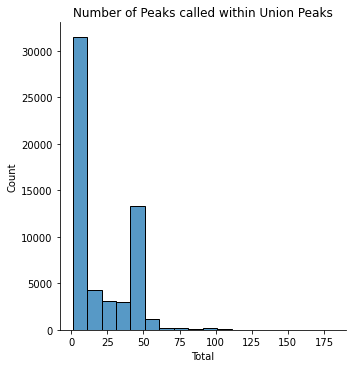

In [165]:
#plot = pd.Series(union['Total']).hist(bins = 12)
plt = sns.displot(union, x="Total", binwidth=10).set(title='Number of Peaks called within Union Peaks')
#sns.displot(union, x="Total", kind = "kde")
#plot.set_title('Total number of Peaks called within Union Peaks')
plt.savefig('/datashare/project/fgenomics/jinchaus/rotation/plots/Number_peaks_called_pre-filtering.png', dpi =400)


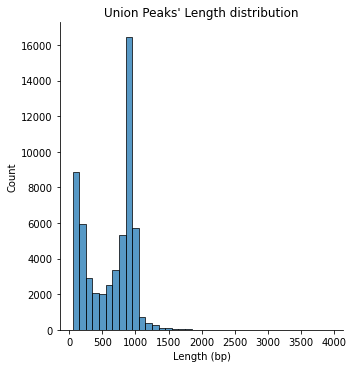

In [166]:
#plot = pd.Series(union['Total']).hist(bins = 12)
plt = sns.displot(union, x="length", binwidth=100).set(title="Union Peaks' Length distribution", xlabel = "Length (bp)")
#sns.displot(union, x="Total", kind = "kde")
#plot.set_title('Total number of Peaks called within Union Peaks')

plt.savefig('/datashare/project/fgenomics/jinchaus/rotation/plots/Peaks_length_pre-filtering.png', dpi =400)


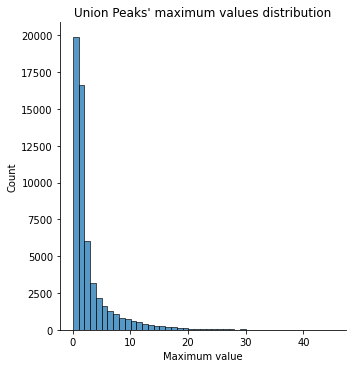

In [167]:
#plot = pd.Series(union['Total']).hist(bins = 12)
plt = sns.displot(union, x="max", binwidth=1).set(title="Union Peaks' maximum values distribution", xlabel = "Maximum value")
#sns.displot(union, x="Total", kind = "kde")
#plot.set_title('Total number of Peaks called within Union Peaks')

plt.savefig('/datashare/project/fgenomics/jinchaus/rotation/plots/Max_values_pre-filtering.png', dpi =400)


In [168]:
union_f = union[(union['Total']<=60) & (union['length']>=150)]

Text(0.5, 1.0, 'Total number of values per peak distribution')

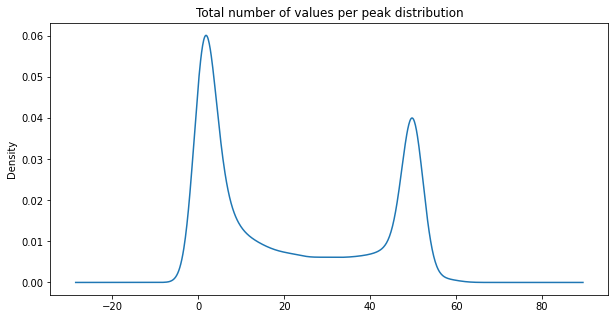

In [169]:
plot = pd.Series(union_f['Total']).plot.kde()
plot.set_title("Total number of values per peak distribution")

Text(0.5, 1.0, 'Peak Length distribution')

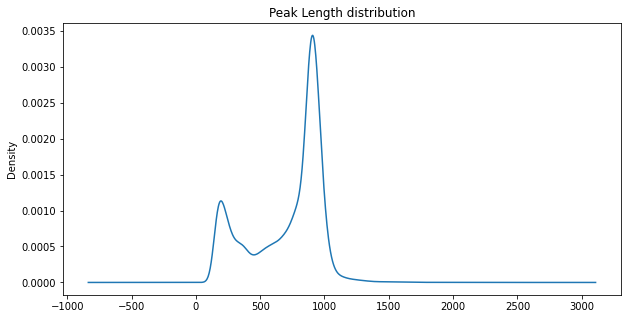

In [170]:
plot = pd.Series(union_f['length']).plot.kde()
plot.set_title("Peak Length distribution")

Text(0.5, 1.0, 'Union ATAC max peak values distribution')

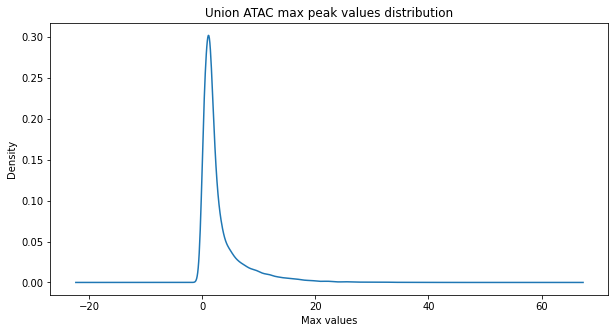

In [171]:
plot = union_f['max'].plot.kde()
plot.set_xlabel("Max values")
plot.set_title("Union ATAC max peak values distribution")

In [173]:
union[['max']].describe()

,max
count,56899.000000
mean,2.898560
std,3.985970
min,0.052286
25%,0.847993
50%,1.471560
75%,3.076890
max,44.908700


In [ ]:
union_f[['max']].quantile(0.3)

In [ ]:
union_f[['length']].describe()

In [ ]:
union[['length']].describe()

In [ ]:
union[['max']].describe()

In [ ]:
union[['max']].quantile(0.3)

In [ ]:
union_f[['max']].quantile(0.323)

In [ ]:
union_filtered = union[(union['Total']<=60) & (union['length']>=150) & (union['max']>=1.11916)]

In [ ]:
#union_filtered[['Chromosome','start','end','length','CoefOfVar','SD','Total','max','mean','median', 'Q1','Q3']].to_csv('Union_filtered_T60_L150_M30.csv', header = False, sep = "\t", index=False)



Now making bedfile for H3K27ac windows

In [ ]:
union_filtered["start-500"]=round((union_filtered['start'] + (union_filtered['length']/2) - 500)).astype(int)

In [ ]:
union_filtered["end-500"]=round((union_filtered['end'] - (union_filtered['length']/2) + 500)).astype(int)

In [ ]:
union_filtered["start-500-300"]=round((union_filtered['start'] + (union_filtered['length']/2) - 500 -300)).astype(int)

In [ ]:
union_filtered["end-500-300"]=round((union_filtered['end'] - (union_filtered['length']/2) + 500 + 300)).astype(int)

In [ ]:
union_filtered["start-500-600"]=round((union_filtered['start'] + (union_filtered['length']/2) - 500 - 600)).astype(int)
union_filtered["end-500-600"]=round((union_filtered['end'] - (union_filtered['length']/2) + 500 + 600)).astype(int)


In [ ]:
#union_filtered[['Chromosome','start-500','end-500','start', 'end','length','max']].to_csv('Union-500bp_filtered_T60_L150_M30.csv', header = False, sep = "\t", index=False)
#f = open('colnames_union_filtered.txt', 'w').write("Chromosome, start-500, end-500, start-ATAC-union, end-ATAC-union, length-ATAC-union, Max_peak_value")

In [ ]:
#union_filtered[['Chromosome','start-500-300','end-500-300','start','end','length','max']].to_csv('Union-500-300bp_filtered_T60_L150_M30.csv', header = False, sep = "\t", index=False)

In [ ]:
#union_filtered[['Chromosome','start-500-600','end-500-600','start','end','length','max']].to_csv('Union-500-600bp_filtered_T60_L150_M30.csv', header = False, sep = "\t", index=False)

In [ ]:
#union_filtered[['Chromosome','start','end','Total']].to_csv('Union_filtered_T60_L150_M30_Total_n_peaks.csv', sep = "\t", index=False)

# Merge individual ATAC files with values from Union positions

In [2]:
import sys  
sys.path.insert(0, '/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/ATAC/lanceotron/maxunion')

In [3]:

path = '/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/ATAC/lanceotron/maxunion' # use your path


In [4]:
union_vals = pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/ATAC/lanceotron/maxunion/Don001_ATAC_lanceotron_values_union_with_ID.bed", delimiter=' ')

for don in range(2,10):
    file = pd.read_csv(path+"/Don00"+str(don)+"_ATAC_lanceotron_values_union_with_ID.bed", delimiter=' ')
    union_vals = union_vals.merge(file, on= ["Chromosome", "start", "end", "length", "Max_peak_value"])
 

In [5]:
for don in range(10,51):
    file = pd.read_csv(path+"/Don0"+str(don)+"_ATAC_lanceotron_values_union_with_ID.bed", delimiter=' ')
    union_vals = union_vals.merge(file, on= ["Chromosome", "start", "end", "length", "Max_peak_value"])
 

In [6]:
union_vals2 = union_vals.copy()

In [7]:
union_vals2["ID"] = union_vals2["Chromosome"].str.cat(union_vals2[["start", "end"]].astype(str), sep="-")

In [8]:
Donors2 = list(union_vals2)[5:]

In [9]:
Donors2 = [Donors2[-1]] + Donors2[:-1] # put ID as first column
union_vals2 = union_vals2[Donors2]

#path1 = "/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/Values_only_ATAC.csv"
#path2 = "/datashare/project/fgenomics/jinchaus/rotation/lanceotron/ATAC/Values_only_ATAC.csv"
#union_vals2.to_csv(path1, sep = "\t", index=False)
#union_vals2.to_csv(path2, sep = "\t", index=False)

# ATAC Statistical analysis to find variable peaks

In [10]:
Donors = list(union_vals)[5:]

In [ ]:
df = union_vals[Donors]

In [ ]:
df = df.T

In [ ]:
def ks_test(x,y):
    return stats.ks_2samp(x, y)[-1]
def mwu_test(x,y):
    return stats.mannwhitneyu(x, y)[-1]

ks_results = {}

for peak in df.columns[:]:
    temp = np.array(df[peak])
    
    pvals = []
    for rep in range(101):
        random_donors = random.sample(range(0,49), 20)
        temp1= temp[random_donors] 
        mask = np.ones(50, dtype=bool)
        mask[random_donors] = False
        temp2 = temp[mask]
        random_donors_2 = random.sample(range(0,29), 20)
        temp3 = temp2[random_donors_2]
        pval= ks_test(temp1, temp3)
        pvals.append(pval)
        
        
        
    ks_results[peak] = pvals


In [ ]:
results = pd.DataFrame.from_dict(ks_results).median()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
results.plot()

In [ ]:
results[results<0.4]

No significant values

Now we will compute the coefficient of variation only for extreme quantiles in order to exacerbate the variance

In [11]:
CoeffsVarQ1Q3 = []

for peak in df.columns[:]:
    temp = np.array(df[peak])
    quantiles = pd.qcut(temp, q = 3, labels=False, duplicates = "drop")
    temp1 = temp[(quantiles == 0) | (quantiles == 2)]
    CoeffVarQ1Q3= temp1.std()/temp1.mean()
    CoeffsVarQ1Q3.append(CoeffVarQ1Q3)


NameError: name 'df' is not defined

In [12]:
union_vals["CoefOfVar_Q1Q3_(SD/Mean)_ATAC_union"] = CoeffsVarQ1Q3 

ValueError: Length of values (0) does not match length of index (29777)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
plot = union_vals["CoefOfVar_Q1Q3_(SD/Mean)_ATAC_union"].plot.kde()
plot.set_xlabel("Distribution of the Variation Coefficient when taking extremeties")


# Calculating useful metrics from the ATAC values

In [13]:
union_vals["SD_ATAC_union"] = union_vals[Donors].std(axis = 1)

In [14]:
union_vals['Mean_ATAC_union'] = union_vals[Donors].mean(axis = 1)

In [15]:
union_vals['Max_ATAC_union'] = union_vals[Donors].max(axis = 1)

In [16]:
union_vals['Min_ATAC_union'] = union_vals[Donors].min(axis = 1)

In [17]:
union_vals["CoefOfVar_(SD/Mean)_ATAC_union"] = union_vals["SD_ATAC_union"]/union_vals["Mean_ATAC_union"]

In [18]:
union_vals['Max-Mean_ATAC_union'] = union_vals['Max_ATAC_union'] - union_vals['Mean_ATAC_union']

In [19]:
union_vals_long = pd.melt(union_vals, id_vars = ["Chromosome", "start", "end", "length", "Max_peak_value", "SD_ATAC_union","Mean_ATAC_union","CoefOfVar_(SD/Mean)_ATAC_union", "Max-Mean_ATAC_union"], value_vars = Donors, var_name = "Donors", value_name = "value" )



In [20]:
union_vals_long=union_vals_long.sort_values(by = ["Chromosome", "start", "end"])

In [21]:
start= union_vals_long["start"].unique()

In [22]:
union_vals_long["start"]

0             827137
29777         827137
59554         827137
89331         827137
119108        827137
             ...    
1369741    155880917
1399518    155880917
1429295    155880917
1459072    155880917
1488849    155880917
Name: start, Length: 1488850, dtype: int64

Text(0.5, 1.0, 'Some union peaks values accross the 50 individuals')

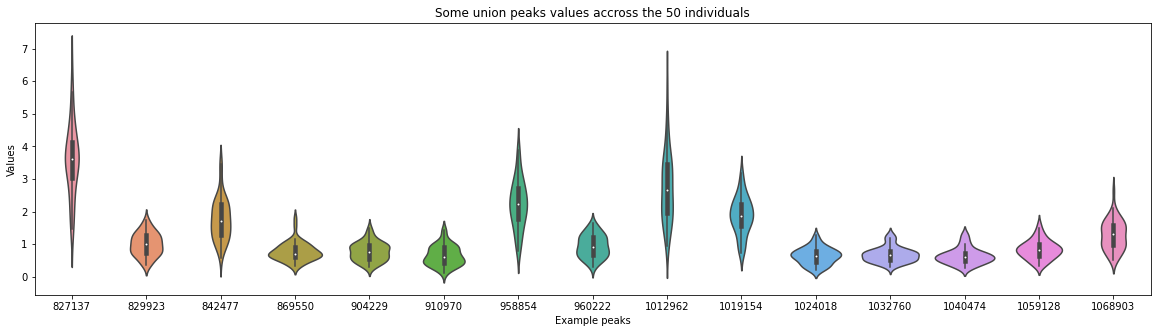

In [23]:
plt.rcParams['figure.figsize'] = [20, 5]
ax = sns.violinplot(x = "start", y="value", data=union_vals_long[union_vals_long["start"].isin(start[0:15])])
ax.set_xlabel("Example peaks")
ax.set_ylabel("Values")
ax.set_title("Some union peaks values accross the 50 individuals")

Text(0.5, 1.0, 'SD of track values at union peaks')

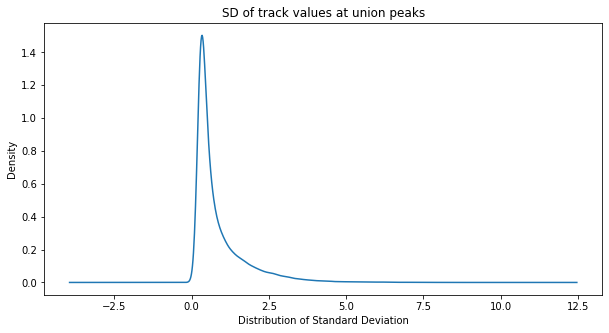

In [24]:
plt.rcParams['figure.figsize'] = [10, 5]
plot = union_vals["SD_ATAC_union"].plot.kde()
plot.set_xlabel("Distribution of Standard Deviation")
plot.set_title("SD of track values at union peaks")



In [25]:
union_vals["SD_ATAC_union"].describe()

count    29777.000000
mean         0.852358
std          0.851782
min          0.155754
25%          0.323095
50%          0.504309
75%          1.039336
max          8.359380
Name: SD_ATAC_union, dtype: float64

Now we will plot values for some peaks with high SD

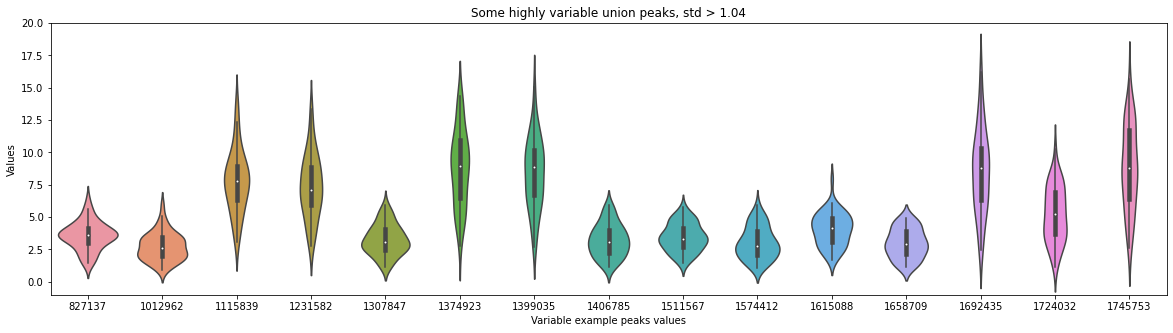

In [26]:
cutoff = 1.04
union_vals_long_high_variation = union_vals_long[union_vals_long["SD_ATAC_union"]> cutoff]
start_high_variation= union_vals_long_high_variation["start"].unique()
plt.rcParams['figure.figsize'] = [20, 5]
ax = sns.violinplot(x = "start", y="value", data=union_vals_long_high_variation[union_vals_long_high_variation["start"].isin(start_high_variation[0:15])])
ax.set_xlabel("Variable example peaks values")
ax.set_ylabel("Values")
ax.set_title("Some highly variable union peaks, std > " + str(cutoff))
ax.set(ylim=(-1, 20))
plt.savefig('some_high_var_peaks.png', dpi =500)

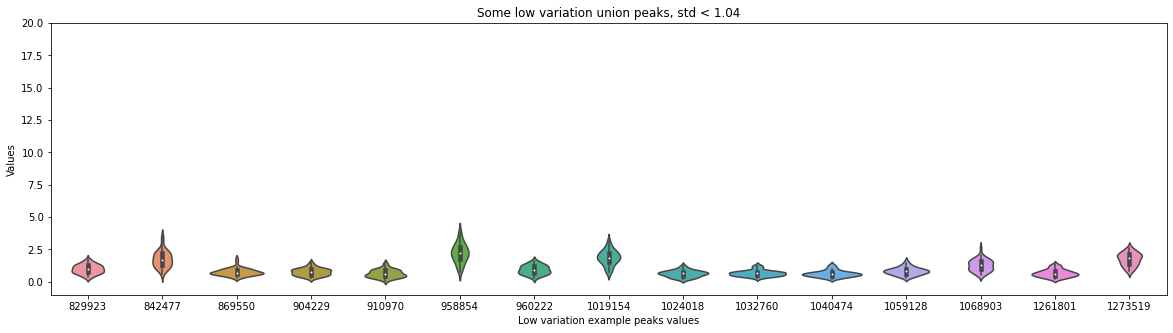

In [27]:
cutoff = 1.04
union_vals_long_low_variation = union_vals_long[union_vals_long["SD_ATAC_union"]<= cutoff]
start_low_variation= union_vals_long_low_variation["start"].unique()
plt.rcParams['figure.figsize'] = [20, 5]
ax = sns.violinplot(x = "start", y="value", data=union_vals_long_low_variation[union_vals_long_low_variation["start"].isin(start_low_variation[0:15])])
ax.set_xlabel("Low variation example peaks values")
ax.set_ylabel("Values")
ax.set_title("Some low variation union peaks, std < "+ str(cutoff))
ax.set(ylim=(-1, 20))
plt.savefig('some_low_var_peaks.png', dpi =500)

We need to control for max peak values to see variation while controling for peak size, because larger peaks would otherwise look as if they vary more.

In [29]:
union_vals["CoefOfVar_(SD/Mean)_ATAC_union"].describe()

count    29777.000000
mean         0.395619
std          0.118280
min          0.235023
25%          0.340022
50%          0.372798
75%          0.420308
max          5.059216
Name: CoefOfVar_(SD/Mean)_ATAC_union, dtype: float64

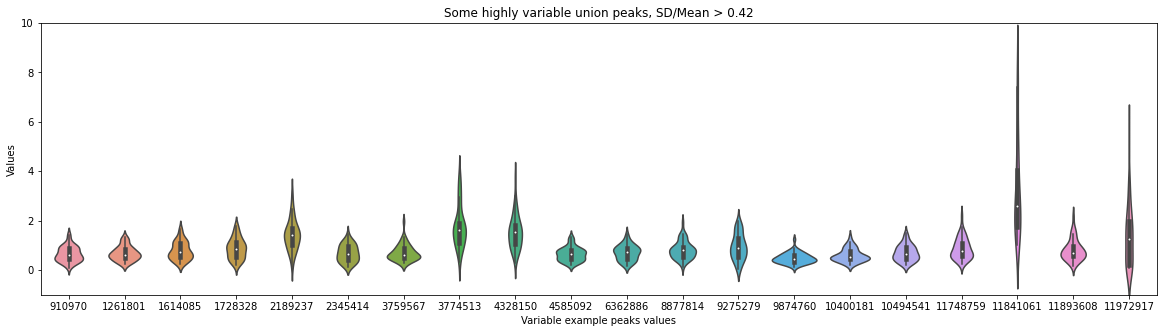

In [30]:
cutoff = 0.42
union_vals_long_relative_high_variation = union_vals_long[union_vals_long["CoefOfVar_(SD/Mean)_ATAC_union"]> cutoff]
start_relative_high_variation= union_vals_long_relative_high_variation["start"].unique()
plt.rcParams['figure.figsize'] = [20, 5]
ax = sns.violinplot(x = "start", y="value", data=union_vals_long_relative_high_variation[union_vals_long_relative_high_variation["start"].isin(start_relative_high_variation[0:20])])
ax.set_xlabel("Variable example peaks values")
ax.set_ylabel("Values")
ax.set_title("Some highly variable union peaks, SD/Mean > " + str(cutoff))
ax.set(ylim=(-1, 10))
plt.savefig('some_high_var_peaks_relative_to_mean.png', dpi =500)

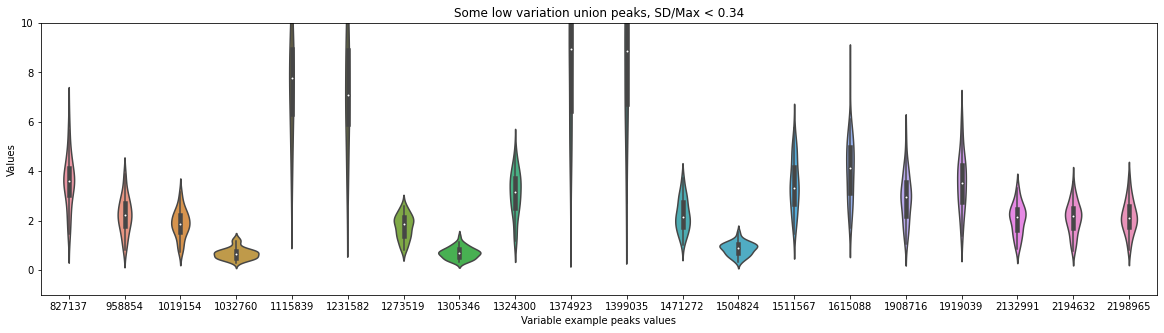

In [36]:
cutoff = 0.34
union_vals_long_relative_low_variation = union_vals_long[union_vals_long["CoefOfVar_(SD/Mean)_ATAC_union"]<= cutoff]
start_relative_low_variation= union_vals_long_relative_low_variation["start"].unique()
plt.rcParams['figure.figsize'] = [20, 5]
ax = sns.violinplot(x = "start", y="value", data=union_vals_long_relative_low_variation[union_vals_long_relative_low_variation["start"].isin(start_relative_low_variation[0:20])])
ax.set_xlabel("Variable example peaks values")
ax.set_ylabel("Values")
ax.set_title("Some low variation union peaks, SD/Max < " + str(cutoff))
ax.set(ylim=(-1, 10))
plt.savefig('some_low_var_peaks_relative_to_mean.png', dpi =500)

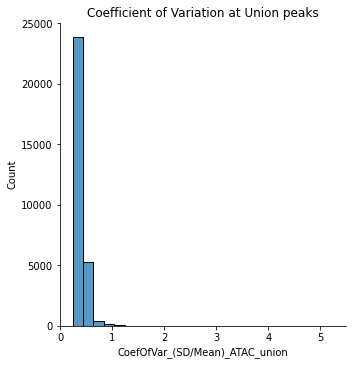

In [46]:

plt = sns.displot(union_vals, x="CoefOfVar_(SD/Mean)_ATAC_union", binwidth=0.2).set(title="Coefficient of Variation at Union peaks")

#plt.savefig('/datashare/project/fgenomics/jinchaus/rotation/plots/Coefficient_of_Var_peaks_filtered_union.png', dpi =400)


In [ ]:
union_vals.rename({'start':'start-ATAC-union', 'end':'end-ATAC-union', 'length':'length-ATAC-union', 'Max_peak_value':'Max_peak_value_ATAC'}, axis = 1, inplace =True)
#union_vals[["Chromosome", "start-ATAC-union", "end-ATAC-union", "length-ATAC-union", "Max_peak_value_ATAC", "CoefOfVar_Q1Q3_(SD/Mean)_ATAC_union", "SD_ATAC_union","Mean_ATAC_union","Min_ATAC_union","Max_ATAC_union","CoefOfVar_(SD/Mean)_ATAC_union", "Max-Mean_ATAC_union"]].to_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/ATAC/lanceotron/maxunion/MLV_bedtools_100bp_union_ATAC_lanceotron_values_with_variance.csv", sep = "\t", index=False)
#union_vals[["Chromosome", "start-ATAC-union", "end-ATAC-union", "length-ATAC-union", "Max_peak_value_ATAC","CoefOfVar_Q1Q3_(SD/Mean)_ATAC_union", "SD_ATAC_union","Mean_ATAC_union","Min_ATAC_union","Max_ATAC_union","CoefOfVar_(SD/Mean)_ATAC_union", "Max-Mean_ATAC_union"]].to_csv("/datashare/project/fgenomics/jinchaus/rotation/lanceotron/ATAC/MLV_bedtools_100bp_union_ATAC_lanceotron_values_with_variance.csv", sep = "\t", index=False)


# Merge individual H3K27ac files with values from Union 

Starting with 500 bp window, then change window

In [ ]:
import sys  
sys.path.insert(0, '/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/with-ID')

In [ ]:

path = "/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/with_ID" # use your path


In [ ]:
window="500-600" # change window here

In [ ]:
union_vals = pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/with_ID/Don001_H3K27ac_"+window+"bp_lanceotron_values_union_with_ID.bed", delimiter=' ')
 
for don in range(2,10):
    file = pd.read_csv(path+"/Don00"+str(don)+"_H3K27ac_"+window+"bp_lanceotron_values_union_with_ID.bed", delimiter=' ')
    union_vals = union_vals.merge(file, on= ["Chromosome", "start-"+window, "end-"+window,"start-ATAC-union", "end-ATAC-union", "length-ATAC-union"])
 

In [ ]:
for don in range(10,51):
    file = pd.read_csv(path+"/Don0"+str(don)+"_H3K27ac_"+window+"bp_lanceotron_values_union_with_ID.bed", delimiter=' ')
    union_vals = union_vals.merge(file, on= ["Chromosome", "start-"+window, "end-"+window,"start-ATAC-union", "end-ATAC-union", "length-ATAC-union"])
 

In [ ]:
Donors = list(union_vals)[6:]
union_vals2 = union_vals.copy() # To send to simone for Self Organising Maps


In [ ]:
union_vals2

In [ ]:
union_vals2["ID"] = union_vals2["Chromosome"].str.cat(union_vals2[["start-500-600", "end-500-600"]].astype(str), sep="-")
Donors2 = list(union_vals2)[6:]
Donors2 = [Donors2[-1]] + Donors2[:-1]
union_vals2 = union_vals2[Donors2]

path1 = "/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/Values_only_H3K27ac_window"+window+"bp.csv"
path2 = "/datashare/project/fgenomics/jinchaus/rotation/lanceotron/ATAC/Values_only_H3K27ac_window"+window+"bp.csv"
#union_vals2.to_csv(path1, sep = "\t", index=False)
#union_vals2.to_csv(path2, sep = "\t", index=False)

In [ ]:
union_vals3 = union_vals.copy()
union_vals3["ID"] = union_vals3["Chromosome"].str.cat(union_vals3[["start-ATAC-union", "end-ATAC-union"]].astype(str), sep="-")
Donors3 = list(union_vals3)[6:]
Donors3 = [Donors3[-1]] + Donors3[:-1]
union_vals3 = union_vals3[Donors3]
union_vals3

In [ ]:

path1 = "/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/Values_only_H3K27ac_window"+window+"bp_ATAC_ID.csv"
path2 = "/datashare/project/fgenomics/jinchaus/rotation/lanceotron/ATAC/Values_only_H3K27ac_window"+window+"bp_ATAC_ID.csv"
#union_vals3.to_csv(path1, sep = "\t", index=False)
#union_vals3.to_csv(path2, sep = "\t", index=False)

# H3K27ac Statistical analysis to find variable peaks

In [ ]:
df = union_vals[Donors]

In [ ]:
df = df.T

In [ ]:
def ks_test(x,y):
    return stats.ks_2samp(x, y)[-1]
def mwu_test(x,y):
    return stats.mannwhitneyu(x, y)[-1]

ks_results = {}

for peak in df.columns[:]:
    temp = np.array(df[peak])
    
    pvals = []
    for rep in range(101):
        random_donors = random.sample(range(0,49), 20)
        temp1= temp[random_donors] 
        mask = np.ones(50, dtype=bool)
        mask[random_donors] = False
        temp2 = temp[mask]
        random_donors_2 = random.sample(range(0,29), 20)
        temp3 = temp2[random_donors_2]
        pval= ks_test(temp1, temp3)
        pvals.append(pval)
        
        
        
    ks_results[peak] = pvals


In [ ]:
results = pd.DataFrame.from_dict(ks_results).median()

In [ ]:
results.plot()

Not significant. Now trying to run tests on quantiles instead. We find that it's always significant.

In [ ]:
min(pd.DataFrame.from_dict(ks_results).median())

In [ ]:
temp1 = temp[temp < np.percentile(temp,50)]
print(temp1)

temp2 = temp[temp >= np.percentile(temp,50)]
print(temp2)

pval= ks_test(temp1, temp2)

print(pval)

In [ ]:
bonferroni_p_val = 0.1e29777

In [ ]:
bonferroni_p_val

In [ ]:
df_pvals = pd.DataFrame(pvals) 

In [ ]:
pd.DataFrame(pvals).describe()

In [ ]:
CoeffsVarQ1Q3 = []

for peak in df.columns[:]:
    temp = np.array(df[peak])
    quantiles = pd.qcut(temp, q = 3, labels=False, duplicates = "drop")
    temp1 = temp[(quantiles == 0) | (quantiles == 2)]
    CoeffVarQ1Q3= temp1.std()/temp1.mean()
    CoeffsVarQ1Q3.append(CoeffVarQ1Q3)


In [ ]:
union_vals["CoefOfVar_Q1Q3_K27_"+window+"_union"] = CoeffsVarQ1Q3 

In [ ]:
union_vals["CoefOfVar_Q1Q3_K27_"+window+"_union"].plot()

In [ ]:
pd.DataFrame(sorted(union_vals["CoefOfVar_Q1Q3_K27_"+window+"_union"])).plot()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
plot = union_vals["CoefOfVar_Q1Q3_K27_"+window+"_union"].plot.kde()
plot.set_xlabel("Distribution of the Variation Coefficient when taking extremeties")


# Calculating more metrics 

In [ ]:
union_vals["Max_K27_"+window+"bp_union"] = union_vals[Donors].max(axis = 1)

In [ ]:
union_vals["Min_K27_"+window+"bp_union"] = union_vals[Donors].min(axis = 1)

In [ ]:
union_vals["Drop_(Max-Min/Max)_K27_"+window+"bp_union"] = (union_vals["Max_K27_"+window+"bp_union"]-union_vals["Min_K27_"+window+"bp_union"])/union_vals["Max_K27_"+window+"bp_union"]

In [ ]:
union_vals["Mean_K27_"+window+"bp_union"] = union_vals[Donors].mean(axis = 1)

In [ ]:
union_vals["SD_K27_"+window+"bp_union"] = union_vals[Donors].std(axis = 1)

In [ ]:
#union_vals["MedianAbsDev_K27_"+window+"bp_union/Mean"] = union_vals[Donors].apply(lambda x: stats.median_abs_deviation(x)/(x.mean()), axis = 1)

In [ ]:
union_vals["CoefOfVar_K27_"+window+"bp_union"] = union_vals["SD_K27_"+window+"bp_union"]/union_vals["Mean_K27_"+window+"bp_union"]


In [ ]:
#union_vals["Max-Mean_K27_"+window+"bp_union"] = union_vals["Max_K27_"+window+"bp_union"] - union_vals["Mean_K27_"+window+"bp_union"]



In [ ]:
#union_vals["Mean-Min_K27_"+window+"bp_union"] = union_vals["Mean_K27_"+window+"bp_union"] - union_vals["Min_K27_"+window+"bp_union"]


In [ ]:
maincols = union_vals.columns[~union_vals.columns.str.contains("Don")]

In [ ]:
union_vals[maincols]

In [ ]:

path1 = "/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/MLV_union_H3K27ac_window"+window+"bp_lanceotron_values_with_variance.csv"

In [ ]:
path2 = "/datashare/project/fgenomics/jinchaus/rotation/lanceotron/ATAC/MLV_union_H3K27ac_window"+window+"bp_lanceotron_values_with_variance.csv"

In [ ]:
#union_vals[maincols].to_csv(path1, sep = "\t", index=False)
#union_vals[maincols].to_csv(path2, sep = "\t", index=False)

In [ ]:
pd.read_csv(path1, sep = "\t" )

# Merging all metrics from ATAC and H3K27ac

In [101]:
H3K27ac_500bp = pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/MLV_union_H3K27ac_window500bp_lanceotron_values_with_variance.csv", sep = "\t" )
H3K27ac_500_300bp = pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/MLV_union_H3K27ac_window500-300bp_lanceotron_values_with_variance.csv", sep = "\t" )
H3K27ac_500_600bp = pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/MLV_union_H3K27ac_window500-600bp_lanceotron_values_with_variance.csv", sep = "\t" )
ATAC_union= pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/ATAC/lanceotron/maxunion/MLV_bedtools_100bp_union_ATAC_lanceotron_values_with_variance.csv", sep = "\t" )

ATAC_union_total_n_peaks= pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/ATAC/lanceotron/maxpeaks/Union_filtered_T60_L150_M30_Total_n_peaks.csv", sep = "\t" )





In [107]:
ATAC_union = ATAC_union.merge(ATAC_union_total_n_peaks, on= ["Chromosome", "start-ATAC-union", "end-ATAC-union"]) 

In [108]:
main_union_file = ATAC_union.merge(H3K27ac_500bp, on= ["Chromosome", "start-ATAC-union", "end-ATAC-union", "length-ATAC-union"])
 

In [109]:
main_union_file = main_union_file.merge(H3K27ac_500_300bp, on= ["Chromosome", "start-ATAC-union", "end-ATAC-union", "length-ATAC-union"])
 

In [110]:
main_union_file = main_union_file.merge(H3K27ac_500_600bp, on= ["Chromosome", "start-ATAC-union", "end-ATAC-union", "length-ATAC-union"])


In [111]:
path1 = "/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/MLV_main_union ATAC_K27_with_variance.csv"

In [61]:
path2 = "/datashare/project/fgenomics/jinchaus/rotation/lanceotron/ATAC/MLV_main_union ATAC_K27_with_variance.csv"

In [62]:
#main_union_file.to_csv(path1, sep = "\t", index=False)
#main_union_file.to_csv(path2, sep = "\t", index=False)

In [113]:
main_union_file['TotalN_ATAC_peaks_called']= pd.to_numeric(main_union_file['TotalN_ATAC_peaks_called'])

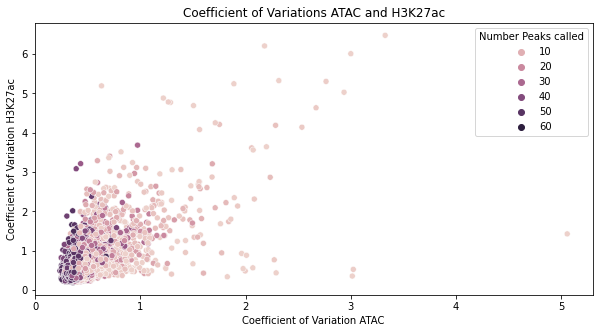

In [122]:
plot = sns.scatterplot(data=main_union_file, 
                x='CoefOfVar_(SD/Mean)_ATAC_union', 
                y='CoefOfVar_K27_500-600bp_union', 
                hue="TotalN_ATAC_peaks_called")

plot.set(title="Coefficient of Variations ATAC and H3K27ac",
        xlabel = "Coefficient of Variation ATAC", 
        ylabel = "Coefficient of Variation H3K27ac")
plot.legend(title="Number Peaks called");
fig = plot.get_figure()

fig.savefig('/datashare/project/fgenomics/jinchaus/rotation/plots/Coefficients_of_Variation.png', dpi =400)


# Merging all metrics for SOM

In [63]:
for_SOM = main_union_file.copy()

In [64]:
for_SOM["ID"] = for_SOM["Chromosome"].str.cat(for_SOM[["start-ATAC-union", "end-ATAC-union"]].astype(str), sep="-")

In [65]:
path3 = "/datashare/project/fgenomics/jinchaus/rotation/lanceotron/ATAC/metrics_forSOM.csv"
#for_SOM[['ID','CoefOfVar_K27_500-600bp_union', 'CoefOfVar_(SD/Mean)_ATAC_union', 'Drop_(Max-Min/Max)_K27_500-600bp_union', 'Min_K27_500-600bp_union','Min_ATAC_union','Mean_ATAC_union', 'Mean_K27_500-600bp_union', 'TotalN_ATAC_peaks_called']].to_csv(path3, sep = "\t", index=False)

In [66]:
low_ATAC_Var = main_union_file[(main_union_file['Min_ATAC_union']>0.5) & (main_union_file['CoefOfVar_(SD/Mean)_ATAC_union']<1.3)].sort_values(by = 'CoefOfVar_(SD/Mean)_ATAC_union')


In [68]:
low_ATAC_Var[:5000]

,Chromosome,start-ATAC-union,end-ATAC-union,length-ATAC-union,Max_peak_value_ATAC,CoefOfVar_Q1Q3_(SD/Mean)_ATAC_union,SD_ATAC_union,Mean_ATAC_union,Min_ATAC_union,Max_ATAC_union,...,CoefOfVar_K27_500-300bp_union,start-500-600,end-500-600,CoefOfVar_Q1Q3_K27_500-600_union,Max_K27_500-600bp_union,Min_K27_500-600bp_union,Drop_(Max-Min/Max)_K27_500-600bp_union,Mean_K27_500-600bp_union,SD_K27_500-600bp_union,CoefOfVar_K27_500-600bp_union
11833,chr17,59331187,59332158,971,2.24300,0.278296,0.343706,1.462433,0.538128,2.24300,...,0.504415,59330572,59332772,0.561280,745.791036,100.114100,0.865761,241.701716,119.277197,0.493489
11607,chr17,42676717,42677679,962,5.64051,0.296031,0.886016,3.596432,1.761970,5.64051,...,0.302473,42676098,42678298,0.346786,9911.208795,2400.221400,0.757828,5196.035282,1562.473244,0.300705
6307,chr12,7932923,7933886,963,2.08795,0.295466,0.334557,1.355438,0.697121,2.08795,...,0.820733,7932304,7934504,0.919747,594.813369,12.609169,0.978801,121.625707,100.569572,0.826878
13698,chr19,49589806,49590809,1003,2.89257,0.300514,0.441749,1.772582,0.782732,2.89257,...,0.620675,49589208,49591408,0.599886,767.226703,67.368596,0.912192,284.158883,151.406422,0.532823
7574,chr12,123972454,123973421,967,2.80933,0.296823,0.415501,1.665599,0.635970,2.80933,...,0.661676,123971838,123974038,0.671817,366.177745,26.664008,0.927183,131.985755,83.460419,0.632344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24518,chr6,155314194,155315163,969,27.74490,0.396899,5.177173,15.474056,5.858260,27.74490,...,0.393277,155313578,155315778,0.444286,2054.282241,379.566295,0.815232,960.233423,369.552995,0.384857
12740,chr19,1275222,1276125,903,4.93447,0.392656,0.900200,2.690555,1.015110,4.93447,...,0.379752,1274574,1276774,0.432260,7086.782549,1512.608415,0.786559,2956.888152,1120.596708,0.378978
21617,chr5,95655270,95656207,937,4.52808,0.398137,0.903104,2.699205,1.088490,4.52808,...,0.454199,95654638,95656838,0.511711,1158.248057,173.063305,0.850582,572.188942,262.862215,0.459398
28246,chr9,91423385,91424269,884,5.88622,0.396048,0.965897,2.886844,1.039570,5.88622,...,0.542235,91422727,91424927,0.576670,22.741610,2.402007,0.894378,9.738020,4.924669,0.505716


<AxesSubplot:>

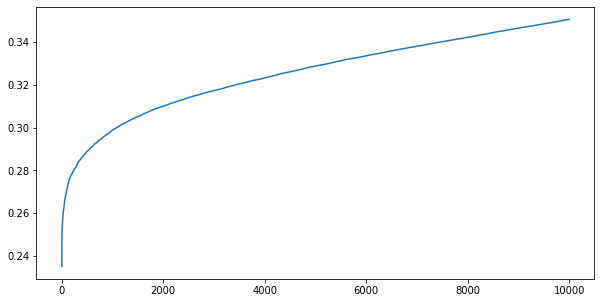

In [69]:
main_union_file.sort_values(by = 'CoefOfVar_(SD/Mean)_ATAC_union')[:10000].reset_index()['CoefOfVar_(SD/Mean)_ATAC_union'].plot()

<AxesSubplot:>

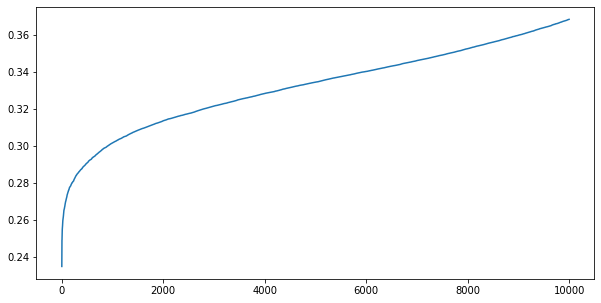

In [70]:
low_ATAC_Var[:10000].reset_index()['CoefOfVar_(SD/Mean)_ATAC_union'].plot()

In [71]:
high_K27_Drop = main_union_file[(main_union_file['Min_ATAC_union']>0.5) & (main_union_file['CoefOfVar_(SD/Mean)_ATAC_union']<1.3)].sort_values(by = 'Drop_(Max-Min/Max)_K27_500-600bp_union', ascending = False)


<AxesSubplot:>

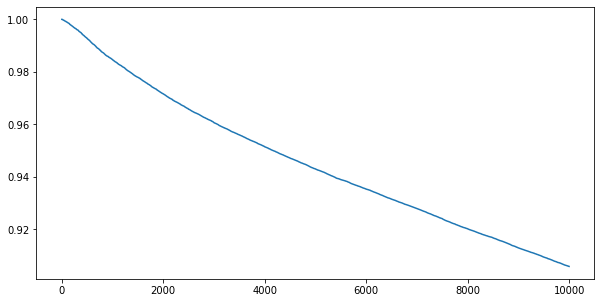

In [72]:
main_union_file.sort_values(by = 'Drop_(Max-Min/Max)_K27_500-600bp_union', ascending = False)[:10000].reset_index()['Drop_(Max-Min/Max)_K27_500-600bp_union'].plot()


<AxesSubplot:>

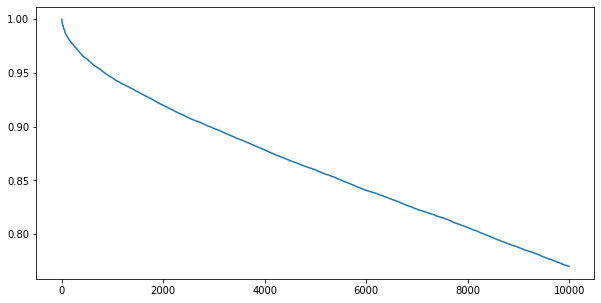

In [73]:
high_K27_Drop[:10000].reset_index()['Drop_(Max-Min/Max)_K27_500-600bp_union'].plot()

In [74]:
high_K27_Var = main_union_file.sort_values(by = 'CoefOfVar_K27_500-600bp_union', ascending = False)


In [75]:
pd.merge(low_ATAC_Var[:5000], high_K27_Drop[:5000], how='inner', on=['Chromosome', 'start-ATAC-union','end-ATAC-union']).sort_values(by = 'Drop_(Max-Min/Max)_K27_500-600bp_union_y', ascending = False)


,Chromosome,start-ATAC-union,end-ATAC-union,length-ATAC-union_x,Max_peak_value_ATAC_x,CoefOfVar_Q1Q3_(SD/Mean)_ATAC_union_x,SD_ATAC_union_x,Mean_ATAC_union_x,Min_ATAC_union_x,Max_ATAC_union_x,...,CoefOfVar_K27_500-300bp_union_y,start-500-600_y,end-500-600_y,CoefOfVar_Q1Q3_K27_500-600_union_y,Max_K27_500-600bp_union_y,Min_K27_500-600bp_union_y,Drop_(Max-Min/Max)_K27_500-600bp_union_y,Mean_K27_500-600bp_union_y,SD_K27_500-600bp_union_y,CoefOfVar_K27_500-600bp_union_y
654,chr2,217905041,217906062,1021,2.84926,0.373916,0.526976,1.673742,0.574659,2.84926,...,1.263708,217904452,217906652,1.185466,1726.709418,9.679085,0.994394,244.801538,297.193624,1.214019
230,chr16,54928788,54929661,873,14.68210,0.350394,2.354296,7.967468,2.715100,14.68210,...,0.668777,54928124,54930324,0.731277,951.965727,11.023484,0.988420,254.152587,171.177607,0.673523
643,chr1,182235915,182236868,953,10.77610,0.371753,1.743217,5.540472,2.645660,10.77610,...,0.995986,182235292,182237492,1.078659,2816.976470,35.333280,0.987457,464.618128,462.501072,0.995443
90,chr9,27529182,27530136,954,2.74476,0.338159,0.435631,1.541176,0.679143,2.74476,...,0.999871,27528559,27530759,0.985458,158.860211,2.101529,0.986771,39.841425,39.273786,0.985753
634,chr8,9150395,9151273,878,9.63200,0.378706,1.580605,5.029437,1.871220,9.63200,...,0.801567,9149734,9151934,0.858193,4772.023153,70.350671,0.985258,1406.788497,1163.293275,0.826914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,chr12,63843561,63844425,864,5.50997,0.339143,0.966387,3.383199,1.186330,5.50997,...,0.465055,63842893,63845093,0.496441,14.785080,2.069028,0.860060,6.922275,2.969660,0.429001
305,chr9,5832566,5833462,896,6.16241,0.353192,1.102058,3.669615,1.700000,6.16241,...,0.515979,5831914,5834114,0.550459,103.712307,14.519649,0.860001,39.387409,19.629352,0.498366
1340,chr3,50600773,50601724,951,5.31493,0.392776,0.872042,2.616617,1.185270,5.31493,...,0.394962,50600148,50602348,0.457618,10947.368180,1533.002259,0.859966,5765.242611,2334.232714,0.404880
563,chr1,93847159,93848037,878,7.68150,0.368229,1.523471,4.884946,1.864890,7.68150,...,0.471101,93846498,93848698,0.524275,709.851533,99.495469,0.859836,299.110680,139.769937,0.467285


In [76]:
pd.merge(low_ATAC_Var[-5000:], high_K27_Drop[-5000:], how='inner', on=['Chromosome', 'start-ATAC-union','end-ATAC-union'])

,Chromosome,start-ATAC-union,end-ATAC-union,length-ATAC-union_x,Max_peak_value_ATAC_x,CoefOfVar_Q1Q3_(SD/Mean)_ATAC_union_x,SD_ATAC_union_x,Mean_ATAC_union_x,Min_ATAC_union_x,Max_ATAC_union_x,...,CoefOfVar_K27_500-300bp_union_y,start-500-600_y,end-500-600_y,CoefOfVar_Q1Q3_K27_500-600_union_y,Max_K27_500-600bp_union_y,Min_K27_500-600bp_union_y,Drop_(Max-Min/Max)_K27_500-600bp_union_y,Mean_K27_500-600bp_union_y,SD_K27_500-600bp_union_y,CoefOfVar_K27_500-600bp_union_y
0,chr10,72354143,72355225,1082,4.79828,0.413808,1.046835,2.934099,1.273100,4.79828,...,0.332760,72353584,72355784,0.378503,11137.328080,2813.271807,0.747402,4692.887087,1569.732285,0.334492
1,chr3,45688809,45689735,926,15.45420,0.421120,3.035370,8.507344,2.610850,15.45420,...,0.388276,45688172,45690372,0.420906,2322.158905,571.946318,0.753701,1161.071455,426.258663,0.367125
2,chr10,50326650,50327545,895,11.02490,0.423933,2.045786,5.733761,2.342310,11.02490,...,0.281279,50325998,50328198,0.344003,15358.866810,3166.322909,0.793844,8272.970929,2403.278665,0.290498
3,chr5,81750838,81751917,1079,13.65300,0.416440,2.541312,7.122540,2.640690,13.65300,...,0.292791,81750278,81752478,0.339774,8500.966073,2681.999687,0.684506,4723.125530,1397.125460,0.295805
4,chr17,42677639,42678659,1020,2.63947,0.421399,0.482197,1.351418,0.522537,2.63947,...,0.266853,42677049,42679249,0.313325,7251.461516,1839.283418,0.746357,4040.628297,1078.027657,0.266797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,chr3,129399116,129400043,927,9.10588,0.538170,1.934314,4.140337,1.118940,9.10588,...,0.294886,129398480,129400680,0.334403,4321.131874,1250.025579,0.710718,2365.182515,695.531274,0.294071
1350,chr2,201117164,201118034,870,3.00138,0.523325,0.611300,1.305437,0.567144,3.00138,...,0.322787,201116499,201118699,0.360385,11950.057690,3235.649624,0.729236,5528.214158,1736.248398,0.314070
1351,chr6,27134183,27134838,655,2.84877,0.522012,0.664476,1.407970,0.548989,2.84877,...,0.296687,27133410,27135610,0.328565,4575.353643,1012.547044,0.778695,2857.929940,797.787285,0.279149
1352,chr20,50958282,50959195,913,5.58735,0.546097,1.133903,2.369743,0.676335,5.58735,...,0.257055,50957638,50959838,0.294996,4618.454486,1497.262432,0.675809,2575.757895,660.171520,0.256302


# Calculating covariance between ATAC and H3K27ac

In [141]:
all_peaks_ATAC = pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/Values_only_ATAC.csv", sep = "\t")
all_peaks_K27 = pd.read_csv("/t1-data/project/fgenomics/jinchaus/rotation/50Donors/peakcall/H3K27ac/sumunion/Values_only_H3K27ac_window500-600bp_ATAC_ID.csv", sep = "\t")
all_peaks_ATAC.iloc[:,1:].shape

(29777, 50)

In [143]:
all_peaks_K27.columns = all_peaks_ATAC.columns

In [150]:
correlation = pd.DataFrame(all_peaks_K27.iloc[:,1:].corrwith(all_peaks_ATAC.iloc[:,1:], axis = 1))

In [147]:
all_peaks_K27.iloc[:,1:].corrwith(all_peaks_ATAC.iloc[:,1:], axis = 1).describe()

count    29777.000000
mean        -0.005061
std          0.235215
min         -0.594479
25%         -0.177707
50%         -0.025678
75%          0.138397
max          0.998096
dtype: float64

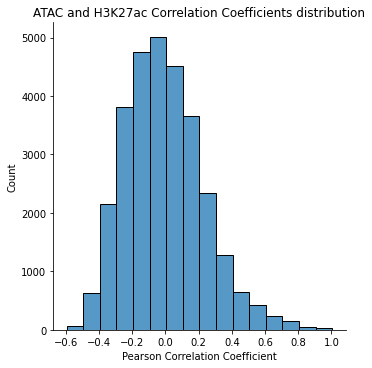

In [154]:
plt = sns.displot(correlation, x=0, binwidth=0.1).set(title="ATAC and H3K27ac Correlation Coefficients distribution",xlabel="Pearson Correlation Coefficient")
plt.savefig('/datashare/project/fgenomics/jinchaus/rotation/plots/Correlation_coefficient.png', dpi =400)

#all_peaks_K27.iloc[:,1:].corrwith(all_peaks_ATAC.iloc[:,1:], axis = 1).hist()

In [126]:
 pd.merge(all_peaks_K27, all_peaks_ATAC, on="ID")

,ID,Don001_K27_500_600bp,Don002_K27_500_600bp,Don003_K27_500_600bp,Don004_K27_500_600bp,Don005_K27_500_600bp,Don006_K27_500_600bp,Don007_K27_500_600bp,Don008_K27_500_600bp,Don009_K27_500_600bp,...,Don041,Don042,Don043,Don044,Don045,Don046,Don047,Don048,Don049,Don050
0,chr1-827137-828028,5066.223801,3072.009926,3767.704604,2277.343231,2056.208693,2309.564902,2205.978804,4336.682684,1840.576691,...,3.801350,3.515020,3.779680,3.452520,1.455390,3.403740,3.440040,1.295290,3.725200,3.806610
1,chr1-829923-830720,558.854617,407.994367,825.097319,331.514932,179.666927,305.580195,453.832238,899.159149,620.477535,...,1.173950,1.171670,1.095560,0.944280,0.415826,0.739389,0.767612,0.362680,1.015960,1.338590
2,chr1-842477-843381,147.696023,173.365111,186.793999,104.364021,89.948761,154.989097,161.144003,258.805460,230.406974,...,1.900680,1.729610,2.026780,1.504950,0.587049,1.631760,1.478360,0.906701,2.144810,1.631400
3,chr1-869550-870311,4.672640,1.706295,1.144129,4.454415,4.542397,6.519577,4.525046,3.347218,3.718479,...,1.006240,0.613734,0.821669,0.649193,0.330215,0.662901,0.625462,0.414492,0.940706,0.794787
4,chr1-904229-905052,1.320528,5.633477,1.294672,3.268185,3.527852,5.790267,2.767384,3.209188,3.233459,...,0.559023,0.446352,0.931225,0.649193,0.452517,0.815878,1.023480,0.375633,0.564424,1.380420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29772,chrX-155434658-155435575,3719.724875,2063.399500,4121.932760,2006.108369,1428.942641,1025.075628,1410.112967,3662.856250,1082.007503,...,4.360380,2.678110,2.793670,2.832840,1.443160,2.383890,2.501850,1.398910,3.386540,4.141260
29773,chrX-155612306-155613220,933.240892,917.743434,327.491736,643.420854,540.637992,532.527656,696.427161,886.874525,531.880753,...,1.509360,1.115880,1.150340,0.796736,0.476977,0.688397,0.739182,0.466303,0.865450,1.087600
29774,chrX-155632242-155633102,5.485274,7.610623,9.393896,13.581120,8.554465,11.116433,10.489874,19.393158,12.333337,...,0.726730,0.557940,0.657335,0.885263,0.317985,0.407939,0.710752,0.310869,0.602052,1.338590
29775,chrX-155745433-155746210,4.909662,1.110446,1.535541,8.400446,4.703804,3.646543,6.544487,1.690863,5.774040,...,0.726730,0.781116,0.986003,0.767228,0.391366,0.611908,0.426451,0.246104,0.564424,0.920280
